<a href="https://colab.research.google.com/github/dinanabila/learning/blob/main/python-angela-yu/day078_movie_budget_and_revenue_analysis/day078_movie_budget_and_revenue_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

ada 5391 baris dan 6 kolom

In [5]:
data.isna().any()

,0
Rank,False
Release_Date,False
Movie_Title,False
USD_Production_Budget,False
USD_Worldwide_Gross,False
USD_Domestic_Gross,False


ga ada missing value

In [6]:
data.duplicated().sum()

0

ga ada duplicated data

In [7]:
data.dtypes

,0
Rank,int64
Release_Date,object
Movie_Title,object
USD_Production_Budget,object
USD_Worldwide_Gross,object
USD_Domestic_Gross,object


semua datatype column nya object, kecuali rank (int)

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [8]:
data.head(2)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0


In [9]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace('$','').str.replace(',','')
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace('$','').str.replace(',','')
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace('$','').str.replace(',','')
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'])
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'])
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'])

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [10]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [11]:
data.dtypes

,0
Rank,int64
Release_Date,datetime64[ns]
Movie_Title,object
USD_Production_Budget,int64
USD_Worldwide_Gross,int64
USD_Domestic_Gross,int64


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [12]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


- rata-rata budget film: 31,113,737.58
- rata-rata revenue gross worldwide: 88,855,421.96
- revenue minimum worldwide dan domestic sama-sama 0
- yang di 25%, budget 5jt, revenue = 3,865,206.00 + 1,330,901.50 > 5jt. Ga profit.

Sekarang kita cari film dengan budget tertinggi (425,000,000.00)

In [13]:
data.sort_values(by='USD_Production_Budget', ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


film yang budget nya paling tinggi: Avatar

selanjutnya, kita cari film dengan revenue worldwide tertinggi (2,783,918,982.00)

In [14]:
data.sort_values(by='USD_Worldwide_Gross', ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


Avatar lagi! Avatar berarti film dengan budget sekaligus revenue tertinggi dibanding film lainnya

selanjutnya kita cari tau, berapa ya revenue film dengan budget terendah (1,100.00)?

In [15]:
data.sort_values(by='USD_Production_Budget', ascending=True).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


Wahh, revenue nya lumayan itu dengan budget segitu.

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [16]:
data[data['USD_Domestic_Gross'] == 0].count()

,0
Rank,512
Release_Date,512
Movie_Title,512
USD_Production_Budget,512
USD_Worldwide_Gross,512
USD_Domestic_Gross,512


ada 512 film yang ga ngehasilin domestic revenue

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [17]:
data[data['USD_Domestic_Gross'] == 0].sort_values(by='USD_Production_Budget', ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0


Film dengan budget tertinggi yang $0 gross (ga punya revenue internasional) judulnya 'Singularity'. Tapi kok bisa? o_o

### Filtering on Multiple Conditions

In [18]:
zero_domestic = data[data['USD_Domestic_Gross'] == 0]
print(f"Jumlah film yang menghasilkan revenue 0 di US: {len(zero_domestic)}")
zero_domestic.sort_values(by='USD_Production_Budget', ascending=False)

Jumlah film yang menghasilkan revenue 0 di US: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


Ternyata yang budget tinggi revenue 0 itu, karena emang filmnya belum rilis pas nge-scrape data nya. Datanya memang belum ada.

Nge-scrape nya tanggal 1 Mei 2018. Dan terlihat ada 4 film dengan budget teratas di dataframe yang tanggal rilis nya lewat dari tanggal scrape. Dan, boleh jadi ada film lainnya juga yang tanggal rilisnya lebih dari tanggal scrape!

Nanti kita periksa.

Tapi sebelum itu, kita periksa dulu, gimana dengan jumlah film yang menghasilkan revenue 0 di dunia?

In [19]:
zero_worldwide = data[data['USD_Worldwide_Gross'] == 0]
print(f"Jumlah film yang menghasilkan revenue 0 di dunia: {len(zero_worldwide)}")

Jumlah film yang menghasilkan revenue 0 di dunia: 357


Jumlah filmnya lebih sedikit. Artinya, ada film yang ditayangkan di dunia, tapi ga ditayangkan di US.

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [20]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross > 0')
print(f"Jumlah film yang dirilis internasional: {len(international_releases)}")
international_releases.tail()

Jumlah film yang dirilis internasional: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [21]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [22]:
unreleased = data[data['Release_Date'] > scrape_date]
print(f"Jumlah film yang belum rilis: {len(unreleased)}")
unreleased

Jumlah film yang belum rilis: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [23]:
data_clean = data[data['Release_Date'] <= scrape_date]
print(f"Jumlah film yang sudah rilis: {len(data_clean)}")

Jumlah film yang sudah rilis: 5384


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [24]:
data_clean['profit'] = data_clean['USD_Worldwide_Gross'] - data_clean['USD_Production_Budget']
print(f"{((data_clean.query('profit < 0').shape[0]) / (data_clean.shape[0])) * 100}%")

37.27711738484398%


<ipython-input-24-89084359932b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['profit'] = data_clean['USD_Worldwide_Gross'] - data_clean['USD_Production_Budget']


Ada 37,2% film yang mengalami kerugian. Lumayan riskan, ya?

# Seaborn for Data Viz: Bubble Charts

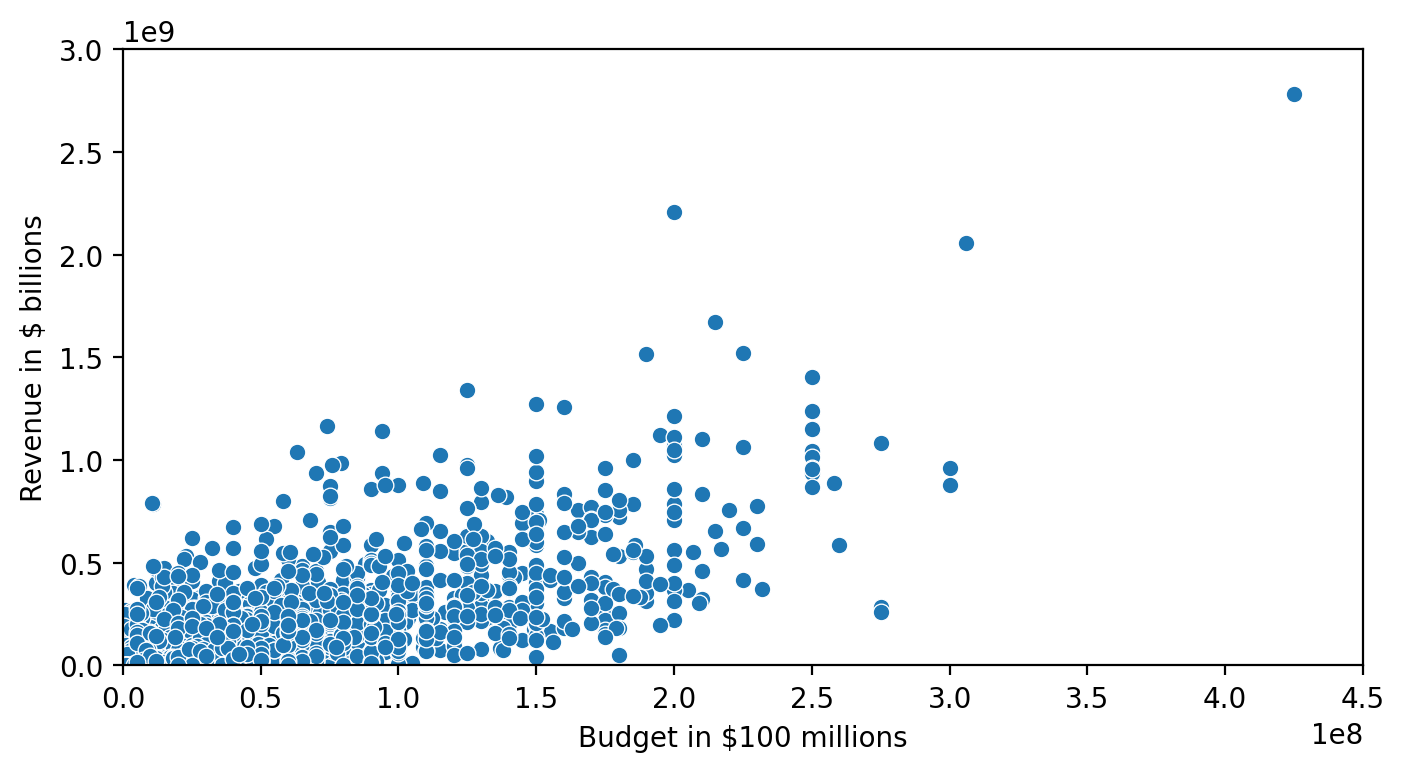

In [25]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')
ax.set(ylim=(0,3000000000),
       xlim=(0,450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

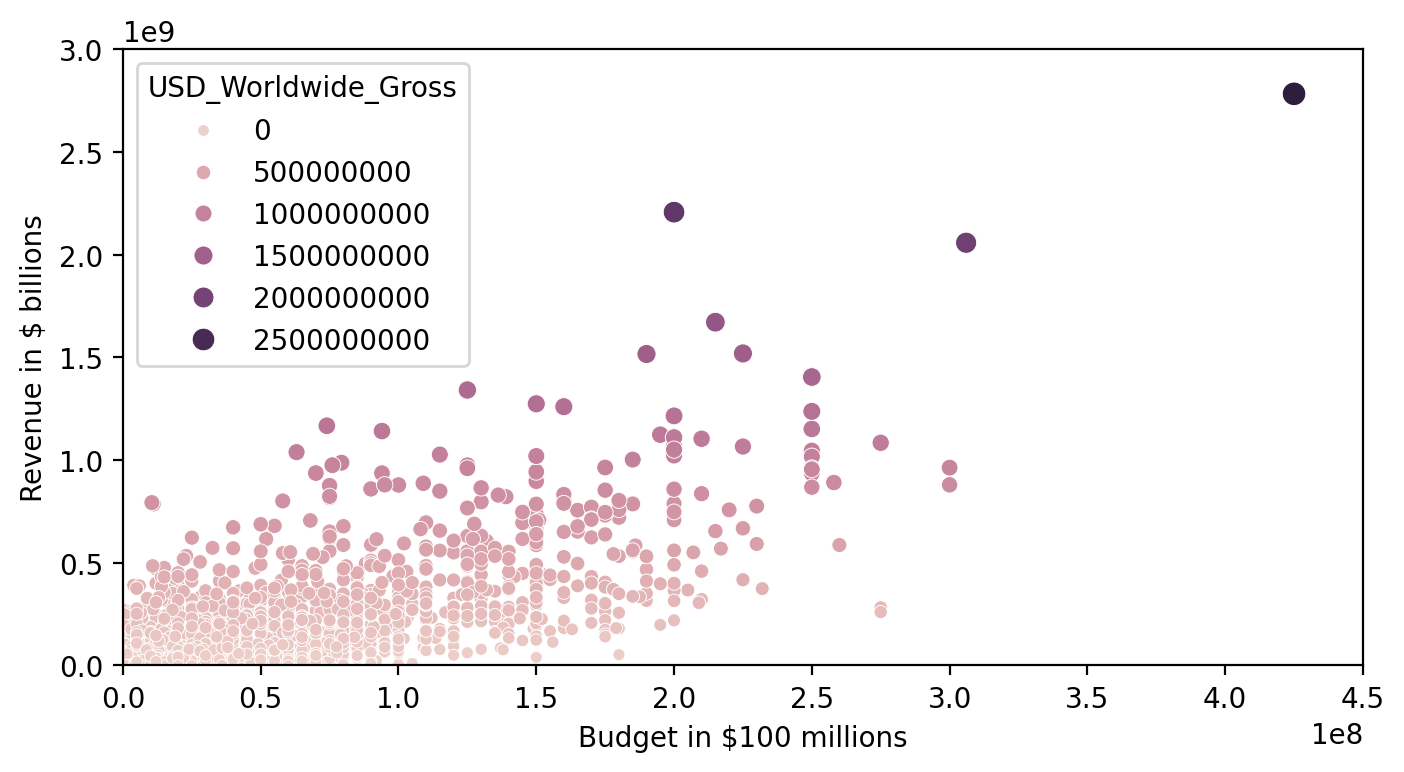

In [26]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                hue='USD_Worldwide_Gross',
                size='USD_Worldwide_Gross')
ax.set(ylim=(0,3000000000),
       xlim=(0,450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

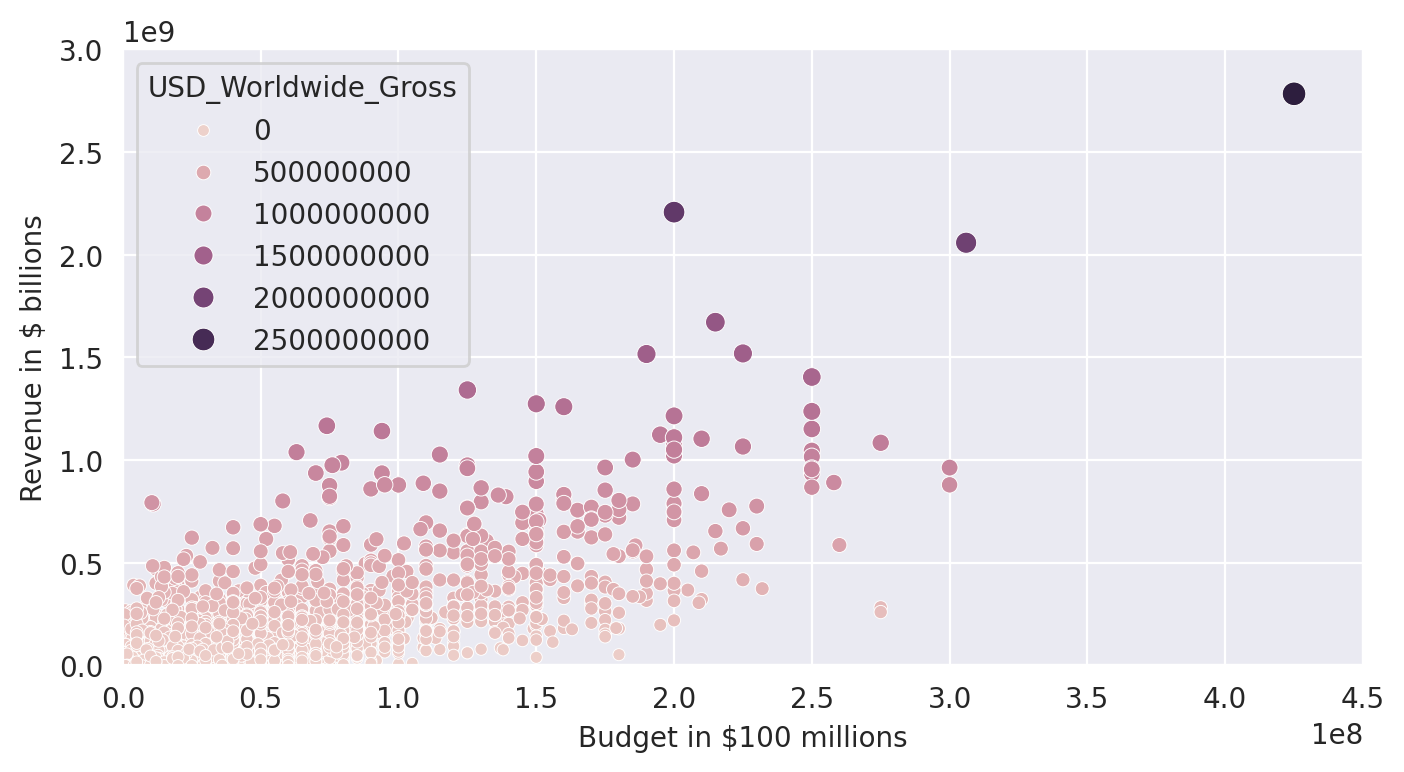

In [27]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'): # buat nambahin style bawaan seaborn secara praktis. darkgrid bisa diganti sesuai yang ada, kek dark, ticks, whitegrid
  ax = sns.scatterplot(data=data_clean,
                  x='USD_Production_Budget',
                  y='USD_Worldwide_Gross',
                  hue='USD_Worldwide_Gross',
                  size='USD_Worldwide_Gross')
  ax.set(ylim=(0,3000000000),
        xlim=(0,450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



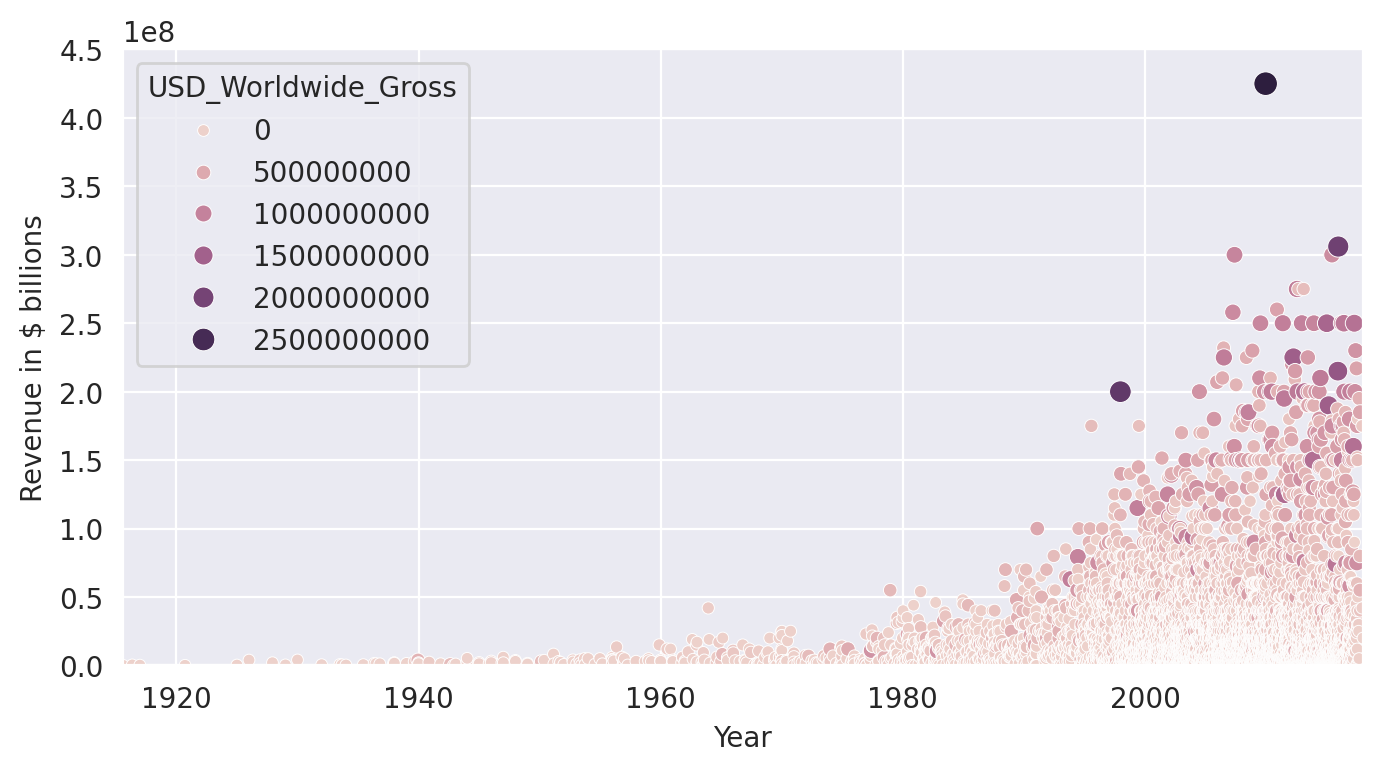

In [28]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'): # buat nambahin style bawaan seaborn secara praktis. darkgrid bisa diganti sesuai yang ada, kek dark, ticks, whitegrid
  ax = sns.scatterplot(data=data_clean,
                  x='Release_Date',
                  y='USD_Production_Budget',
                  hue='USD_Worldwide_Gross',
                  size='USD_Worldwide_Gross')
  ax.set(ylim=(0,450000000),
        xlim=(data_clean['Release_Date'].min(),data_clean['Release_Date'].max()),
        ylabel='Revenue in $ billions',
        xlabel='Year')
plt.show()

Seiring berjalannya waktu, film yang diproduksi semakin banyak. Budget yang dikeluarkan pun juga semakin meningkat.

Dapat dilihat pas era 1920 s.s. 1960an jumlah film masih sedikit. Lalu tahun-tahun setelahnya, jumlah film yang diproduksi semakin banyak (sampai numpuk gitu kan dots nya).

Budget yang dikeluarkan pun juga semakin meningkat, dimulai dari tahun 1980 an.

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [29]:
dt_index = pd.DatetimeIndex(data_clean['Release_Date'])
years = dt_index.year

In [30]:
decades = years//10*10
data_clean['Decade'] = decades

<ipython-input-30-736b23229b1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decade'] = decades


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [31]:
old_films = data_clean[data_clean['Decade'] <= 1960]
new_films = data_clean[data_clean['Decade'] > 1960]

In [32]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,profit,Decade
count,153.00,153,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","25,808,336.73","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"-14,250,000.00","1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","2,175,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","7,364,370.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","27,402,877.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","386,625,192.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41","54,245,459.17",12.72


ada 153 old films

In [33]:
old_films.sort_values(by='USD_Production_Budget', ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,profit,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,29000000,1960


Film jadul yang termahal budgetnya: Cleopatra

# Seaborn Regression Plots

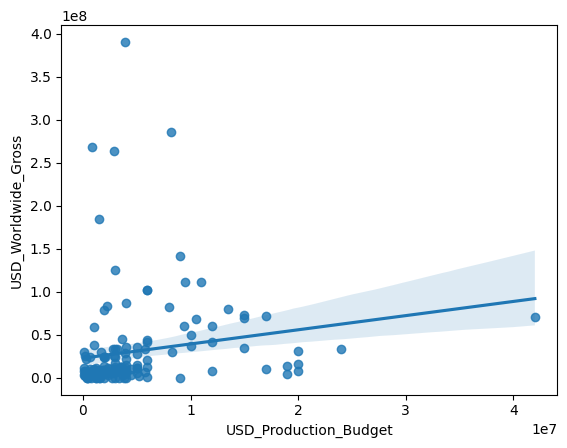

In [34]:
sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')
plt.show()

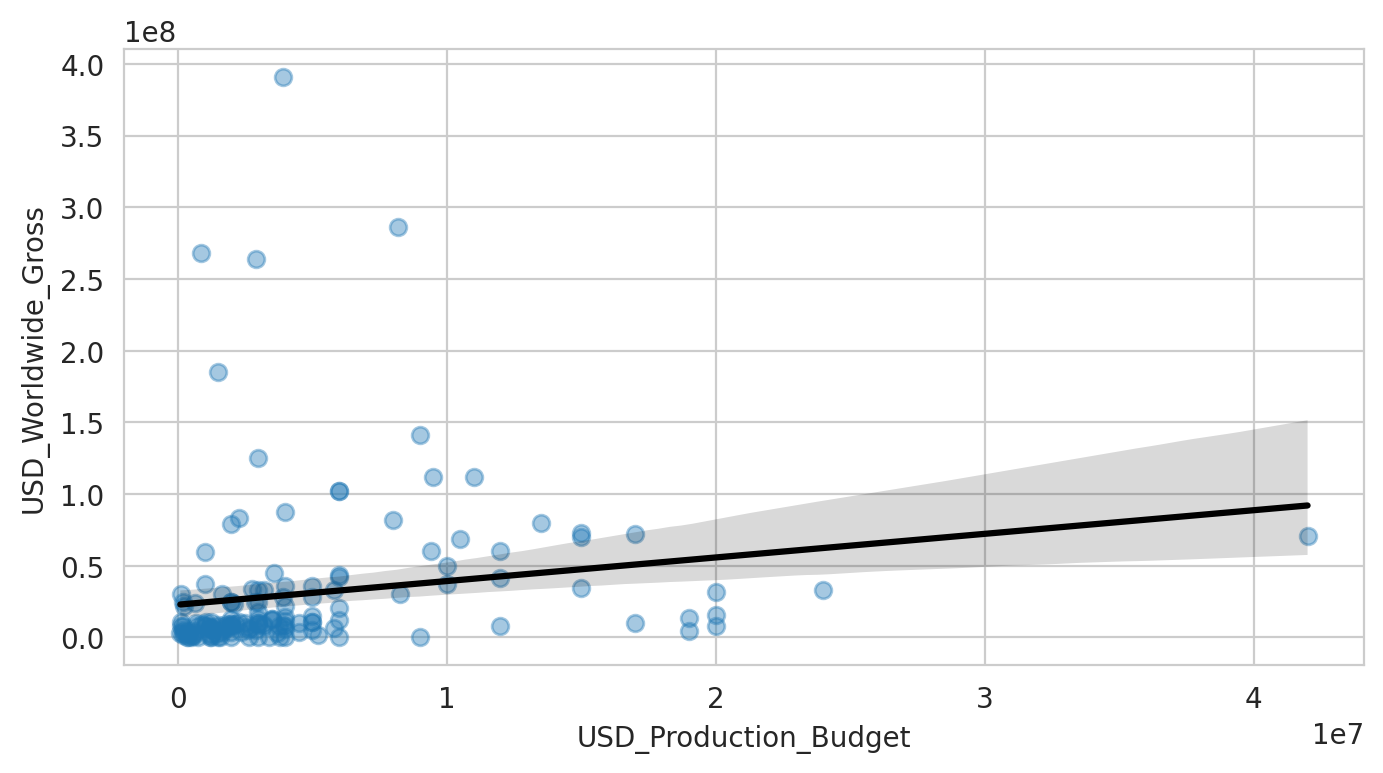

In [35]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.regplot(data=old_films,
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',
              scatter_kws={'alpha': 0.4},
              line_kws={'color': 'black'})
plt.show()

Wah ternyata film yang low budget malah banyak revenue nya! Alhasil hubungan antara budget sama revenue ga terlalu kuat. Ada banyak titik yang jomplang dari garis regresi nya.

Kalau new_films gimana ya? Coba kita periksa.

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

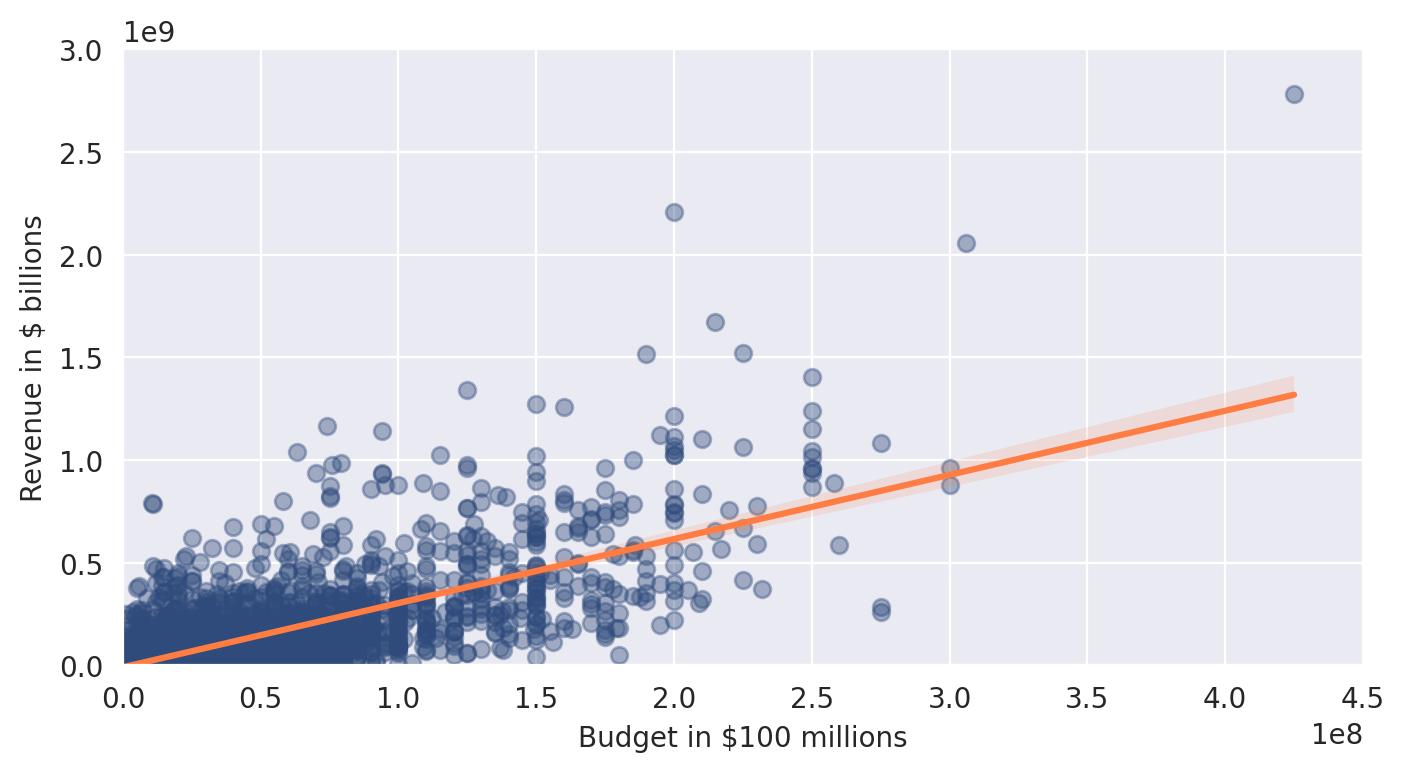

In [36]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',
              color='#2f4b7c',
              scatter_kws={'alpha': 0.4},
              line_kws={'color': '#ff7c43'})
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')
plt.show()

Kali ini hubungannya lebih kuat. Terus bisa diliat juga confidence intervalnya lebih kecil, tanda kalau titik-titik datanya persebarannya ga banyak yang jomplang dari garis regresi.

Dari situ juga, bisa dilihat kalau film yang budget nya <= 150 juta, revenue nya diprediksi bakal mencapai 500 juta (buktinya, rame banget kan titik-titik datanya di bagian itu).

Jadi, kita 'pretty confident', kalau, ada hubungan di antara budget dan revenue worldwide.


Dari sini muncul pertanyaan baru. Seberapa besar variasi di revenue dengan budget tertentu? Dan, seberapa banyak revenue bonus yang diprediksi bisa didapat untuk setiap peningkatan 1 dollar budget?


Kita periksa.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [38]:
regression = LinearRegression()

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [40]:
# explanatory variables or feature(s) dari old_films
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
# response variable or Target dari old_films
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

# ket: LinearRegression() maunya nerima DataFrame, bukan Series. jadi dibikin jadi dataframe dulu X sama y nya

In [41]:
# Dapetin the best-fit line
regression.fit(X, y)

LinearRegression()

In [42]:
# Theta nol atau y-intercept
regression.intercept_

array([22821538.63508039])

interpretasi: kalau budget nya 0, revenuenya 22821538.63508039

o_o

In [43]:
# Theta satu atau slope (gradien)
regression.coef_

array([[1.64771314]])

interpretasi: setiap 1 dollar budget yang dikeluarkan, revenuenya juga meningkat sebesar 1.64771314 dollar. jadi semakin banyak budget yang dikeluarkan, estimasi revenue yang didapat juga bakal semakin tinggi.

In [44]:
# R-squared
regression.score(X, y)

0.02937258620576877

interpretasi: r-squared yang didapat 0.02. artinya, model nya relevan untuk 2% varians revenue. Angka ini kecil, jadi, modelnya ga bisa dibilang kuat.

Tapi ini kan old_films. Gimana kalau new_films? Mungkin beda. Kita cobakan.

In [45]:
# explanatory variables or feature(s) dari old_films
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
# response variable or Target dari old_films
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# ket: LinearRegression() maunya nerima DataFrame, bukan Series. jadi dibikin jadi dataframe dulu X sama y nya

In [46]:
# Dapetin the best-fit line
regression.fit(X, y)

LinearRegression()

In [48]:
# Theta nol atau y-intercept
print(regression.intercept_)

# Theta satu atau slope (gradien)
print(regression.coef_)

# R-squared
print(regression.score(X, y))

[-8650768.00661027]
[[3.12259592]]
0.5577032617720403


interpretasi:
setiap 1 dollar dikeluarkan untuk budget, revenue yang didapat juga meningkat +-3 dollar. Lumayan banget kan. Ini mungkin alasan kenapa semakin banyak film dengan budget tinggi diproduksi.

Dilihat dari r-squared, modelnya kali ini bisa dibilang, lumayanlah, untuk model simpel sekelas univariate regression. Model ini udah relevan sama sekitaran 56% dari varians revenue.

Kata angela: <br/>
"The real world is *super complex*, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model."

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

sekarang kita bisa pakai modelnya buat memprediksi revenue dengan budget sekian :D

In [51]:
# kita pakai model yang new_films
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
print(f"Estimasi revenue untuk film dengan budget {budget} adalah ${revenue_estimate}")

Estimasi revenue untuk film dengan budget 350000000 adalah $1084257803.0557723
